<a href="https://colab.research.google.com/github/yyRegis/projeto-idc/blob/main/ScriptIDC_Arvore_de_Decisao_no_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Atualizado em: 01.2025

In [ ]:
# <> ------------------------------------------------------
# <> Verificando se o pacote está instalado
# <> o símbolo % é para executar no bash
%pip show pycaret

In [1]:
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 787.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 28.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [2]:
# <> ------------------------------------------------------
# <> Se o pacote não tiver instalado
# <> executar o comando abaixo
%pip install pycaret --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# <> ------------------------------------------------------
# <> Verificando se o pacote foi instalado
%pip show pycaret

Name: pycaret
Version: 3.3.2
Summary: PyCaret - An open source, low-code machine learning library in Python.
Home-page: https://github.com/pycaret/pycaret
Author: Moez Ali
Author-email: moez.ali@queensu.ca
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: category-encoders, cloudpickle, deprecation, imbalanced-learn, importlib-metadata, ipython, ipywidgets, jinja2, joblib, kaleido, lightgbm, markupsafe, matplotlib, nbformat, numba, numpy, pandas, plotly, plotly-resampler, pmdarima, psutil, pyod, requests, schemdraw, scikit-learn, scikit-plot, scipy, sktime, statsmodels, tbats, tqdm, wurlitzer, xxhash, yellowbrick
Required-by: 


In [1]:
# <> -----------------------------------------------------
# Lendo as bibliotecas necessárias

# <> -----------------------------
# <> Bibliotecas dos algoritmos
from pycaret.classification import *
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score, classification_report
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np
from pycaret.classification import setup, create_model, tune_model, compare_models, predict_model
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier

# <> Bibliotecas de Visualização
import seaborn as sns
import matplotlib.pyplot as plt

# <> Biliotecas para manipulação com dados
import pandas as pd
from sklearn.preprocessing import LabelEncoder


#### Forma 1 - Utilizando dados separados para treino e teste manualmente

### Variáveis:


- **A**: Representa a altura da árvore (em metros).

- **B**: Representa a largura da árvore (em metros).

- **Class**: Representa o tipo de planta.

In [2]:
url_data = '/content/student_admission_record_dirty.csv'  # Caminho do dataset

df = pd.read_csv(url_data)

In [3]:
# Remover colunas que não interessam--------
df.drop(columns=['Name','City'], inplace=True)

# Corrigir valores negativos
df.loc[df['Age'] < 0, 'Age'] = None
df.loc[df['Admission Test Score'] < 0, 'Admission Test Score'] = None
df.loc[df['High School Percentage'] < 0, 'High School Percentage'] = None

# Remover outliers extremos
percentile_99 = df[['Admission Test Score', 'High School Percentage']].quantile(0.99)
df = df[(df['Admission Test Score'] <= percentile_99['Admission Test Score']) &
        (df['High School Percentage'] <= percentile_99['High School Percentage'])]

# Preencher valores ausentes com a mediana para números e moda para categorias
df.fillna({'Age': df['Age'].median(),
           'Admission Test Score': df['Admission Test Score'].median(),
           'High School Percentage': df['High School Percentage'].median(),
           'Gender': df['Gender'].mode()[0],
           'Admission Status': df['Admission Status'].mode()[0]}, inplace=True)

# Remover registros onde Admission Status está ausente
df.dropna(subset=['Admission Status'], inplace=True)

# Converter variáveis categóricas para numéricas
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [4]:
df.dtypes

,0
Age,float64
Gender,int64
Admission Test Score,float64
High School Percentage,float64
Admission Status,object


In [5]:
df.head()

,Age,Gender,Admission Test Score,High School Percentage,Admission Status
0,24.0,0,50.0,68.90,Rejected
1,21.0,0,99.0,60.73,Rejected
3,17.0,1,55.0,85.29,Rejected
4,20.0,1,65.0,61.13,Rejected
7,20.0,0,82.0,55.67,Accepted


In [6]:
# Now, proceed with train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=123, stratify=df['Admission Status'])

In [7]:
# Validar tamanhos
print("Tamanho treino:", len(df_train))
print("Tamanho teste:", len(df_test))

Tamanho treino: 104
Tamanho teste: 27


In [8]:
# Configurar PyCaret
cdt = setup(data=df_train, target='Admission Status', session_id=123, fix_imbalance=True, normalize=True)


,Description,Value
0,Session id,123
1,Target,Admission Status
2,Target type,Binary
3,Target mapping,"Accepted: 0, Rejected: 1"
4,Original data shape,"(104, 5)"
5,Transformed data shape,"(110, 5)"
6,Transformed train set shape,"(78, 5)"
7,Transformed test set shape,"(32, 5)"
8,Numeric features,4
9,Preprocess,True


Resumo das Métricas:

- **Accuracy**: Mede a taxa de acerto geral.

- **AUC**: Mede a capacidade de discriminação do modelo.

- **Recall**: Mede a capacidade de identificar positivos reais.

- **Precision**: Mede a confiabilidade das previsões positivas.

- **F1**: Equilibra Precision e Recall.

- **Kappa**: Mede a concordância ajustada ao acaso.

- **MCC**: Mede a correlação entre previsões e valores reais, robusta a desbalanceamentos.



In [9]:
# Criar modelo Decision Tree com validação cruzada (evita underfitting)
decision_tree_model = create_model('dt', max_depth=4, min_samples_split=2, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4667,0.5625,0.4667,0.4533,0.4519,-0.0909,-0.0945
1,0.6667,0.6786,0.6667,0.6894,0.6475,0.3119,0.3425
2,0.8571,0.9796,0.8571,0.8889,0.8542,0.7143,0.7454
3,0.5000,0.4479,0.5000,0.5333,0.4923,0.0392,0.0430
4,0.2143,0.0938,0.2143,0.1169,0.1513,-0.4528,-0.6030
Mean,0.5410,0.5525,0.5410,0.5364,0.5194,0.1043,0.0867
Std,0.2143,0.2898,0.2143,0.2571,0.2321,0.3919,0.4494


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [10]:
# Testar modelo nos dados de teste (dados novos, sem "contaminação")
test_predictions = predict_model(decision_tree_model, data=df_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.6296,0.6099,0.6296,0.6305,0.6265,0.2541,0.2570


In [11]:
# <> -----------------------------
# <> Visualizando o modelo
print(decision_tree_model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')


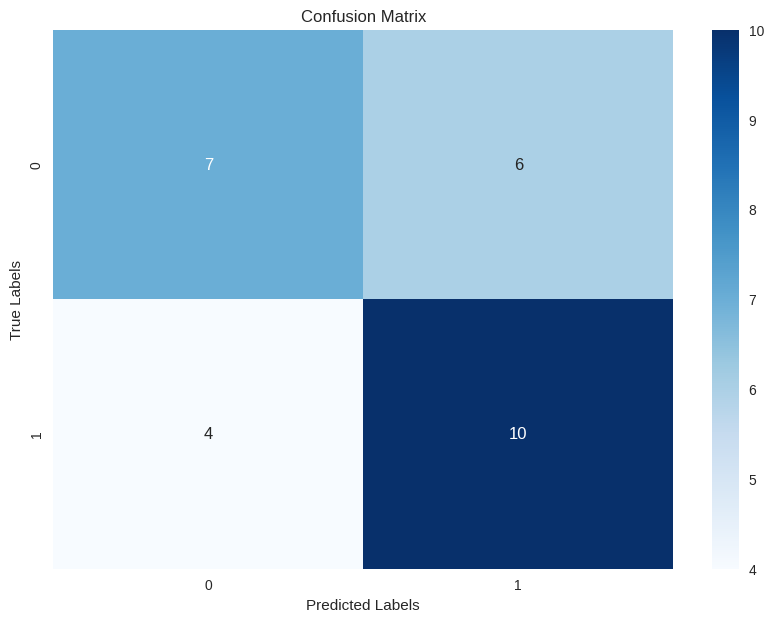

Accuracy: 0.6296296296296297
Kappa: 0.2541436464088397
Classification Report:
              precision    recall  f1-score   support

    Accepted       0.64      0.54      0.58        13
    Rejected       0.62      0.71      0.67        14

    accuracy                           0.63        27
   macro avg       0.63      0.63      0.62        27
weighted avg       0.63      0.63      0.63        27



In [12]:
# Assuming test_predictions['prediction_label'] contains your predicted labels
predicted_labels = test_predictions['prediction_label']
true_labels = df_test['Admission Status']  # Assuming 'Admission Status' is your target column

conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular métricas
accuracy = accuracy_score(true_labels, predicted_labels)
kappa = cohen_kappa_score(true_labels, predicted_labels)
classification_rep = classification_report(true_labels, predicted_labels)

print(f'Accuracy: {accuracy}')
print(f'Kappa: {kappa}')
print('Classification Report:')
print(classification_rep)


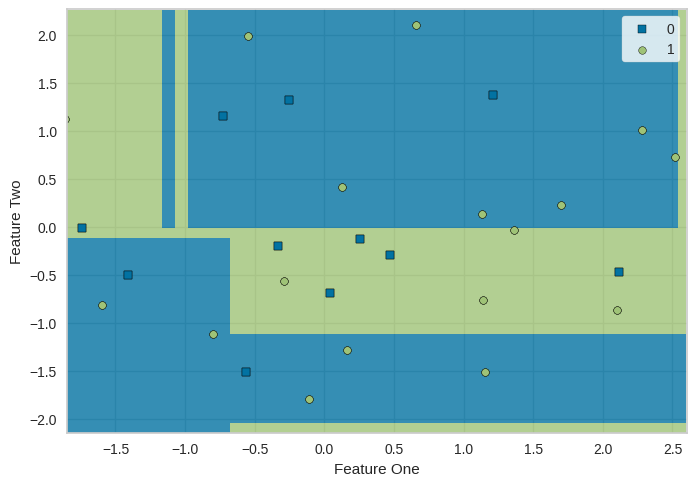

In [13]:
# <> ------------------------------------------------------
# <> Visualizando o boundary
# <>
plot_model(decision_tree_model, plot = 'boundary')

----

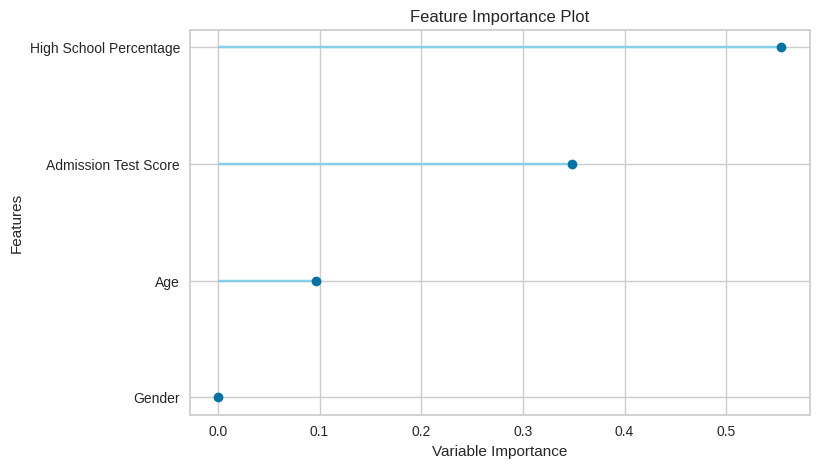

In [14]:
# Assumindo que dt_model é o modelo de árvore de decisão treinado
plot_model(decision_tree_model, plot='feature')

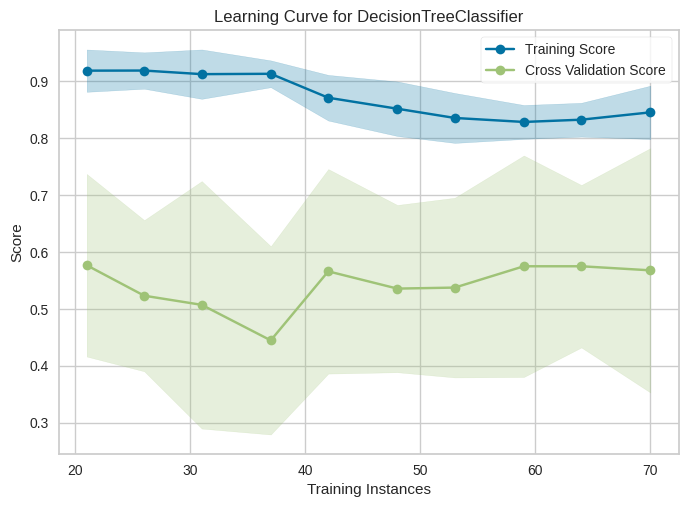

In [15]:
plot_model(decision_tree_model, plot='learning')

In [16]:
# Obter os nomes reais dos recursos da configuração do PyCaret, incluindo quaisquer transformações
feature_names = get_config('X_train').columns.tolist()

# Imprimir o número de features para verificação
print(f"Número de features: {len(feature_names)}")

# Visualizando a estrutura da Árvore
# Get the actual feature names used by the model
model_feature_names = decision_tree_model.feature_names_in_

# Ensure the feature names are a list (if not already)
model_feature_names = list(model_feature_names)

estrutura_DT = export_text(decision_tree_model, feature_names=model_feature_names)  # Usar feature_names atualizados
print(estrutura_DT)

Número de features: 4
|--- High School Percentage <= -0.08
|   |--- Admission Test Score <= 0.36
|   |   |--- High School Percentage <= -1.12
|   |   |   |--- class: 1
|   |   |--- High School Percentage >  -1.12
|   |   |   |--- Age <= -0.99
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  -0.99
|   |   |   |   |--- class: 1
|   |--- Admission Test Score >  0.36
|   |   |--- Admission Test Score <= 0.52
|   |   |   |--- class: 0
|   |   |--- Admission Test Score >  0.52
|   |   |   |--- Admission Test Score <= 1.51
|   |   |   |   |--- class: 1
|   |   |   |--- Admission Test Score >  1.51
|   |   |   |   |--- class: 0
|--- High School Percentage >  -0.08
|   |--- High School Percentage <= 0.33
|   |   |--- class: 0
|   |--- High School Percentage >  0.33
|   |   |--- High School Percentage <= 0.54
|   |   |   |--- Admission Test Score <= -0.77
|   |   |   |   |--- class: 0
|   |   |   |--- Admission Test Score >  -0.77
|   |   |   |   |--- class: 1
|   |   |--- High School Perce

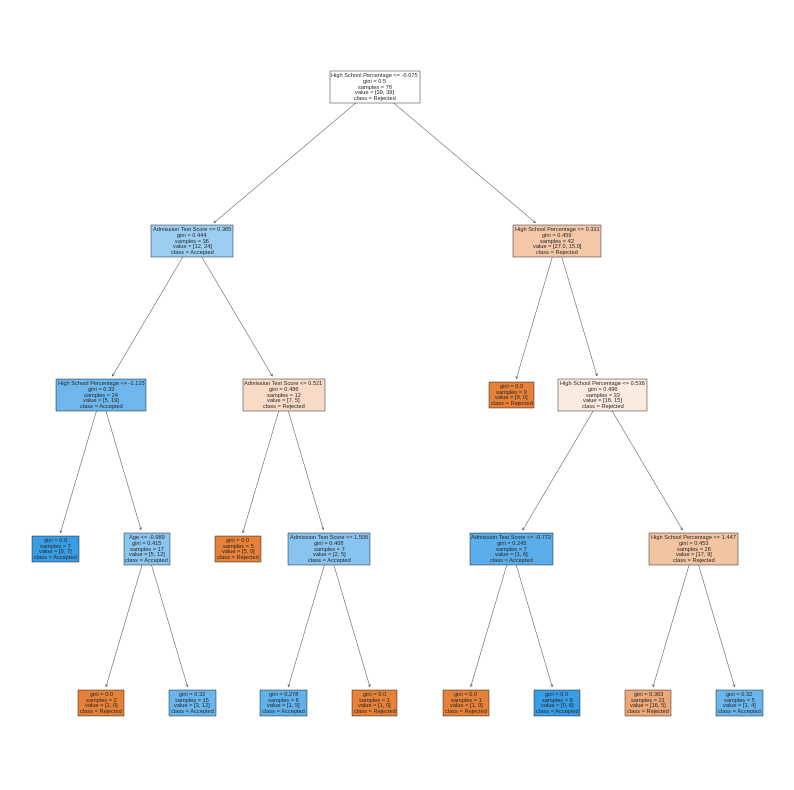

In [17]:
# <> -------------------------------------------
# <> Plotar a árvore de decisão
plt.figure(figsize=(10,10))
# Assuming 'df_train' or 'cdt' contains your training data and target variable
# Replace 'Admission Status' with the actual name of your target column
# Get feature names from PyCaret setup, including any transformations:
#feature_names = get_config('X_train').columns.tolist()  <- This line was replaced

# Using feature_names_in_ to get the original feature names
feature_names = decision_tree_model.feature_names_in_

# OR if the above doesn't work, try:
# feature_names = dt_model.feature_names_in_  # Get feature names directly from the model


plot_tree(decision_tree_model, filled=True, feature_names=feature_names,
          class_names=df_train['Admission Status'].unique())  # Using unique values from the target column
plt.show()